### Load libraries

#### Base Imports

In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#### ML imports

In [36]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, ExtraTreesRegressor

from sklearn.neighbors import KNeighborsRegressor, RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV, BayesianRidge
from sklearn.linear_model import HuberRegressor, TheilSenRegressor, RANSACRegressor

from sklearn.neural_network import MLPRegressor

In [37]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler

from sklearn.metrics import mean_squared_error, median_absolute_error, mean_absolute_error
from sklearn.metrics import r2_score, explained_variance_score

### Load the datasets

In [38]:
train_data = pd.read_csv('C:\\Users\\yhoz\\Documents\\dataanalytics.predictive\\data\\AUSOL\\02-19.csv', delimiter=";")
test_data = pd.read_csv('C:\\Users\\yhoz\\Documents\\dataanalytics.predictive\\data\\AUSOL\\03-19.csv', delimiter=";")

In [121]:
train_data['TIME'] =pd.to_datetime(train_data['FECHA']).map(lambda x: x.strftime('%d %H:%M:%S'))
test_data['TIME'] =pd.to_datetime(test_data['FECHA']).map(lambda x: x.strftime('%d %H:%M:%S'))
train_data.info()

test_data.sort_values(by=['TIME'], inplace=True)
test_data = test_data.reset_index(drop=True)

train_data.sort_values(by=['TIME'], inplace=True)
train_data = train_data.reset_index(drop=True)

test_data['DIA']=pd.to_datetime(test_data['FECHA']).dt.day
train_data['DIA']=pd.to_datetime(train_data['FECHA']).dt.day

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2688 entries, 0 to 2687
Data columns (total 34 columns):
ID_SEGMENT            2688 non-null int64
COD_LABORALIDAD       2688 non-null int64
FECHA                 2688 non-null datetime64[ns]
MES                   2688 non-null int64
HORA                  2688 non-null int64
MINUTO                2688 non-null int64
CANTIDAD_PREC         2688 non-null int64
TOTAL_VEHICULOS       2688 non-null float64
TOTAL_VEHICULOS_1     2688 non-null float64
TOTAL_VEHICULOS_2     2688 non-null float64
TOTAL_VEHICULOS_3     2688 non-null float64
TOTAL_VEHICULOS_4     2688 non-null float64
TOTAL_VEHICULOS_5     2688 non-null float64
TOTAL_VEHICULOS_6     2688 non-null float64
TOTAL_VEHICULOS_7     2688 non-null float64
TOTAL_VEHICULOS_8     2688 non-null float64
TOTAL_VEHICULOS_9     2688 non-null float64
TOTAL_VEHICULOS_10    2688 non-null float64
TOTAL_VEHICULOS_11    2688 non-null float64
TOTAL_VEHICULOS_12    2688 non-null float64
TOTAL_VEHICULOS_13

In [122]:
# train data
train_data = train_data.drop_duplicates(['MES','FECHA', 'ID_SEGMENT'], keep='first')
train_data.fillna(method='ffill', inplace=True)
train_data = train_data.dropna(how='all')
#train_data.isnull().sum()


# test data 
test_data = test_data.drop_duplicates(['MES','FECHA', 'ID_SEGMENT'], keep='first')
test_data.fillna(method='ffill', inplace=True)
test_data = test_data.dropna(how='all')
#test_data.isnull().sum()

In [123]:
id_segment = 1
train_data = train_data.loc[train_data['ID_SEGMENT'] == id_segment]
test_data = test_data.loc[test_data['ID_SEGMENT'] == id_segment]


X_train = train_data.loc[:, train_data.columns.difference(['TIME','FECHA','TOTAL_VEHICULOS'])]
y_train = train_data['TOTAL_VEHICULOS']
X_test = test_data.loc[:, train_data.columns.difference(['TIME','FECHA','TOTAL_VEHICULOS'])]
y_test = test_data['TOTAL_VEHICULOS']

In [124]:
def regression(regressor, x_train, x_test, y_train):
    reg = regressor
    param_grid = {}#'n_estimators': [500], 'max_features': [10,15,20]}
    reg = GridSearchCV(estimator=reg, param_grid=param_grid, n_jobs=1, cv=10, scoring='neg_mean_squared_error')
    reg.fit(x_train, y_train)
    
    y_train_reg = reg.predict(x_train)
    y_test_reg = reg.predict(x_test)
    
    return y_train_reg, y_test_reg

In [133]:
mlmodels_dict = {'AdaBoostRegressor':{'method':AdaBoostRegressor(), 'train': 0, 'test': 0}, 
                 'RandomForestRegressor':{'method': RandomForestRegressor(), 'train': 0, 'test': 0},
                 'ExtraTreesRegressor':{'method': ExtraTreesRegressor(), 'train': 0, 'test': 0},
                 'ExtraTreesRegressorMod':{'method': ExtraTreesRegressor(min_samples_leaf=10), 'train': 0, 'test': 0},
                 'GradientBoostingRegressor':{'method': GradientBoostingRegressor(), 'train': 0, 'test': 0},
                 'BaggingRegressor':{'method': BaggingRegressor(), 'train': 0, 'test': 0},
                 'MLPRegressor':{'method': MLPRegressor(), 'train': 0, 'test': 0},
                 'KNeighborsRegressor':{'method': KNeighborsRegressor(n_neighbors=2), 'train': 0, 'test': 0},
                 
                }

for regr_name, regr_properties in mlmodels_dict.items():
    y_train, y_test  = regression(regr_properties['method'], X_train, X_test, y_train)
    mlmodels_dict[regr_name]['train'] = y_train
    mlmodels_dict[regr_name]['test'] = y_test
    

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", Fut

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: Converge

In [134]:
df_importance = pd.DataFrame(columns=range(len(X_train.columns)))

df_importance.loc[0] = AdaBoostRegressor().fit(X_train, y_train).feature_importances_
df_importance.loc[1] = RandomForestRegressor().fit(X_train, y_train).feature_importances_
df_importance.loc[2] = GradientBoostingRegressor().fit(X_train, y_train).feature_importances_
df_importance.loc[3]= DecisionTreeRegressor().fit(X_train, y_train).feature_importances_
df_importance.loc[4] = ExtraTreesRegressor().fit(X_train, y_train).feature_importances_

c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\yhoz\.conda\envs\predictive.analytics\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [135]:
column_pairs = dict(zip(list(range(len(train_data.columns.difference(['TIME','FECHA','TOTAL_VEHICULOS'])))), list(train_data.columns.difference(['TIME','FECHA','TOTAL_VEHICULOS']))))
index_pairs = dict(zip(list(range(5)), 
                       list(['AdaBoost', 'Random Forest', 'Gradient Boosting', 
                             'Decision Tree', 'Extra Trees'])))
df_importance2 = df_importance.rename(index=index_pairs, columns=column_pairs)

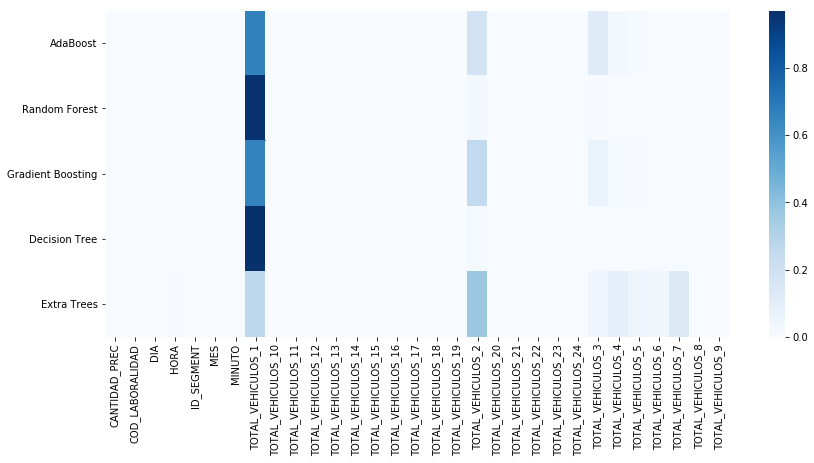

In [136]:
plt.figure(figsize = (14, 6))
sns.heatmap(df_importance2, cmap='Blues');

In [137]:
regressor_list = []
ev_train = []
ev_test = []
r2_test = []
r2_train = []
mse_train = []
mse_test = []
mdae_train = []
mdae_test = []
mae_train = []
mae_test = []

def scores(regressor, y_train, y_test, y_train_reg, y_test_reg):
   
    
    regressor_list.append(str(regressor))
    
    ev_train_c = explained_variance_score(y_train, y_train_reg)
    ev_train.append(ev_train_c)
    ev_test_c = explained_variance_score(y_test, y_test_reg)
    ev_test.append(ev_test_c)
    
    r2_train_c = r2_score(y_train, y_train_reg)
    r2_train.append(r2_train_c)
    r2_test_c = r2_score(y_test, y_test_reg)
    r2_test.append(r2_test_c)
    
    mse_train_c = mean_squared_error(y_train, y_train_reg)
    mse_train.append(mse_train_c)
    mse_test_c = mean_squared_error(y_test, y_test_reg)
    mse_test.append(mse_test_c)

    mae_train_c = mean_absolute_error(y_train, y_train_reg)
    mae_train.append(mae_train_c)
    mae_test_c = mean_absolute_error(y_test, y_test_reg)
    mae_test.append(mae_test_c)  
    
    mdae_train_c = median_absolute_error(y_train, y_train_reg)
    mdae_train.append(mdae_train_c)
    mdae_test_c = median_absolute_error(y_test, y_test_reg)
    mdae_test.append(mdae_test_c)
    
    print("______________________________________________________________________________")
    print(str(regressor))
    print("______________________________________________________________________________")
    print("EV score. Train: ", ev_train_c)
    print("EV score. Test: ", ev_test_c)
    print("---------")
    print("R2 score. Train: ", r2_train_c)
    print("R2 score. Test: ", r2_test_c)
    print("---------")
    print("MSE score. Train: ", mse_train_c)
    print("MSE score. Test: ", mse_test_c)
    print("---------")
    print("MAE score. Train: ", mae_train_c)
    print("MAE score. Test: ", mae_test_c)
    print("---------")
    print("MdAE score. Train: ", mdae_train_c)
    print("MdAE score. Test: ", mdae_test_c)

In [138]:
# get the scores
for regr_name, regr_properties in mlmodels_dict.items():    
    scores(regr_properties['method'], y_train, y_test, regr_properties['train'], regr_properties['test'])


______________________________________________________________________________
AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None)
______________________________________________________________________________
EV score. Train:  0.9910997821867665
EV score. Test:  0.9706240048809468
---------
R2 score. Train:  0.9905327757113346
R2 score. Test:  0.9705447644920012
---------
MSE score. Train:  19.86952172990297
MSE score. Test:  65.95911464511582
---------
MAE score. Train:  3.3113791198138762
MAE score. Test:  5.610036375323127
---------
MdAE score. Train:  2.4292823823151046
MdAE score. Test:  3.6443247368778486
______________________________________________________________________________
RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split

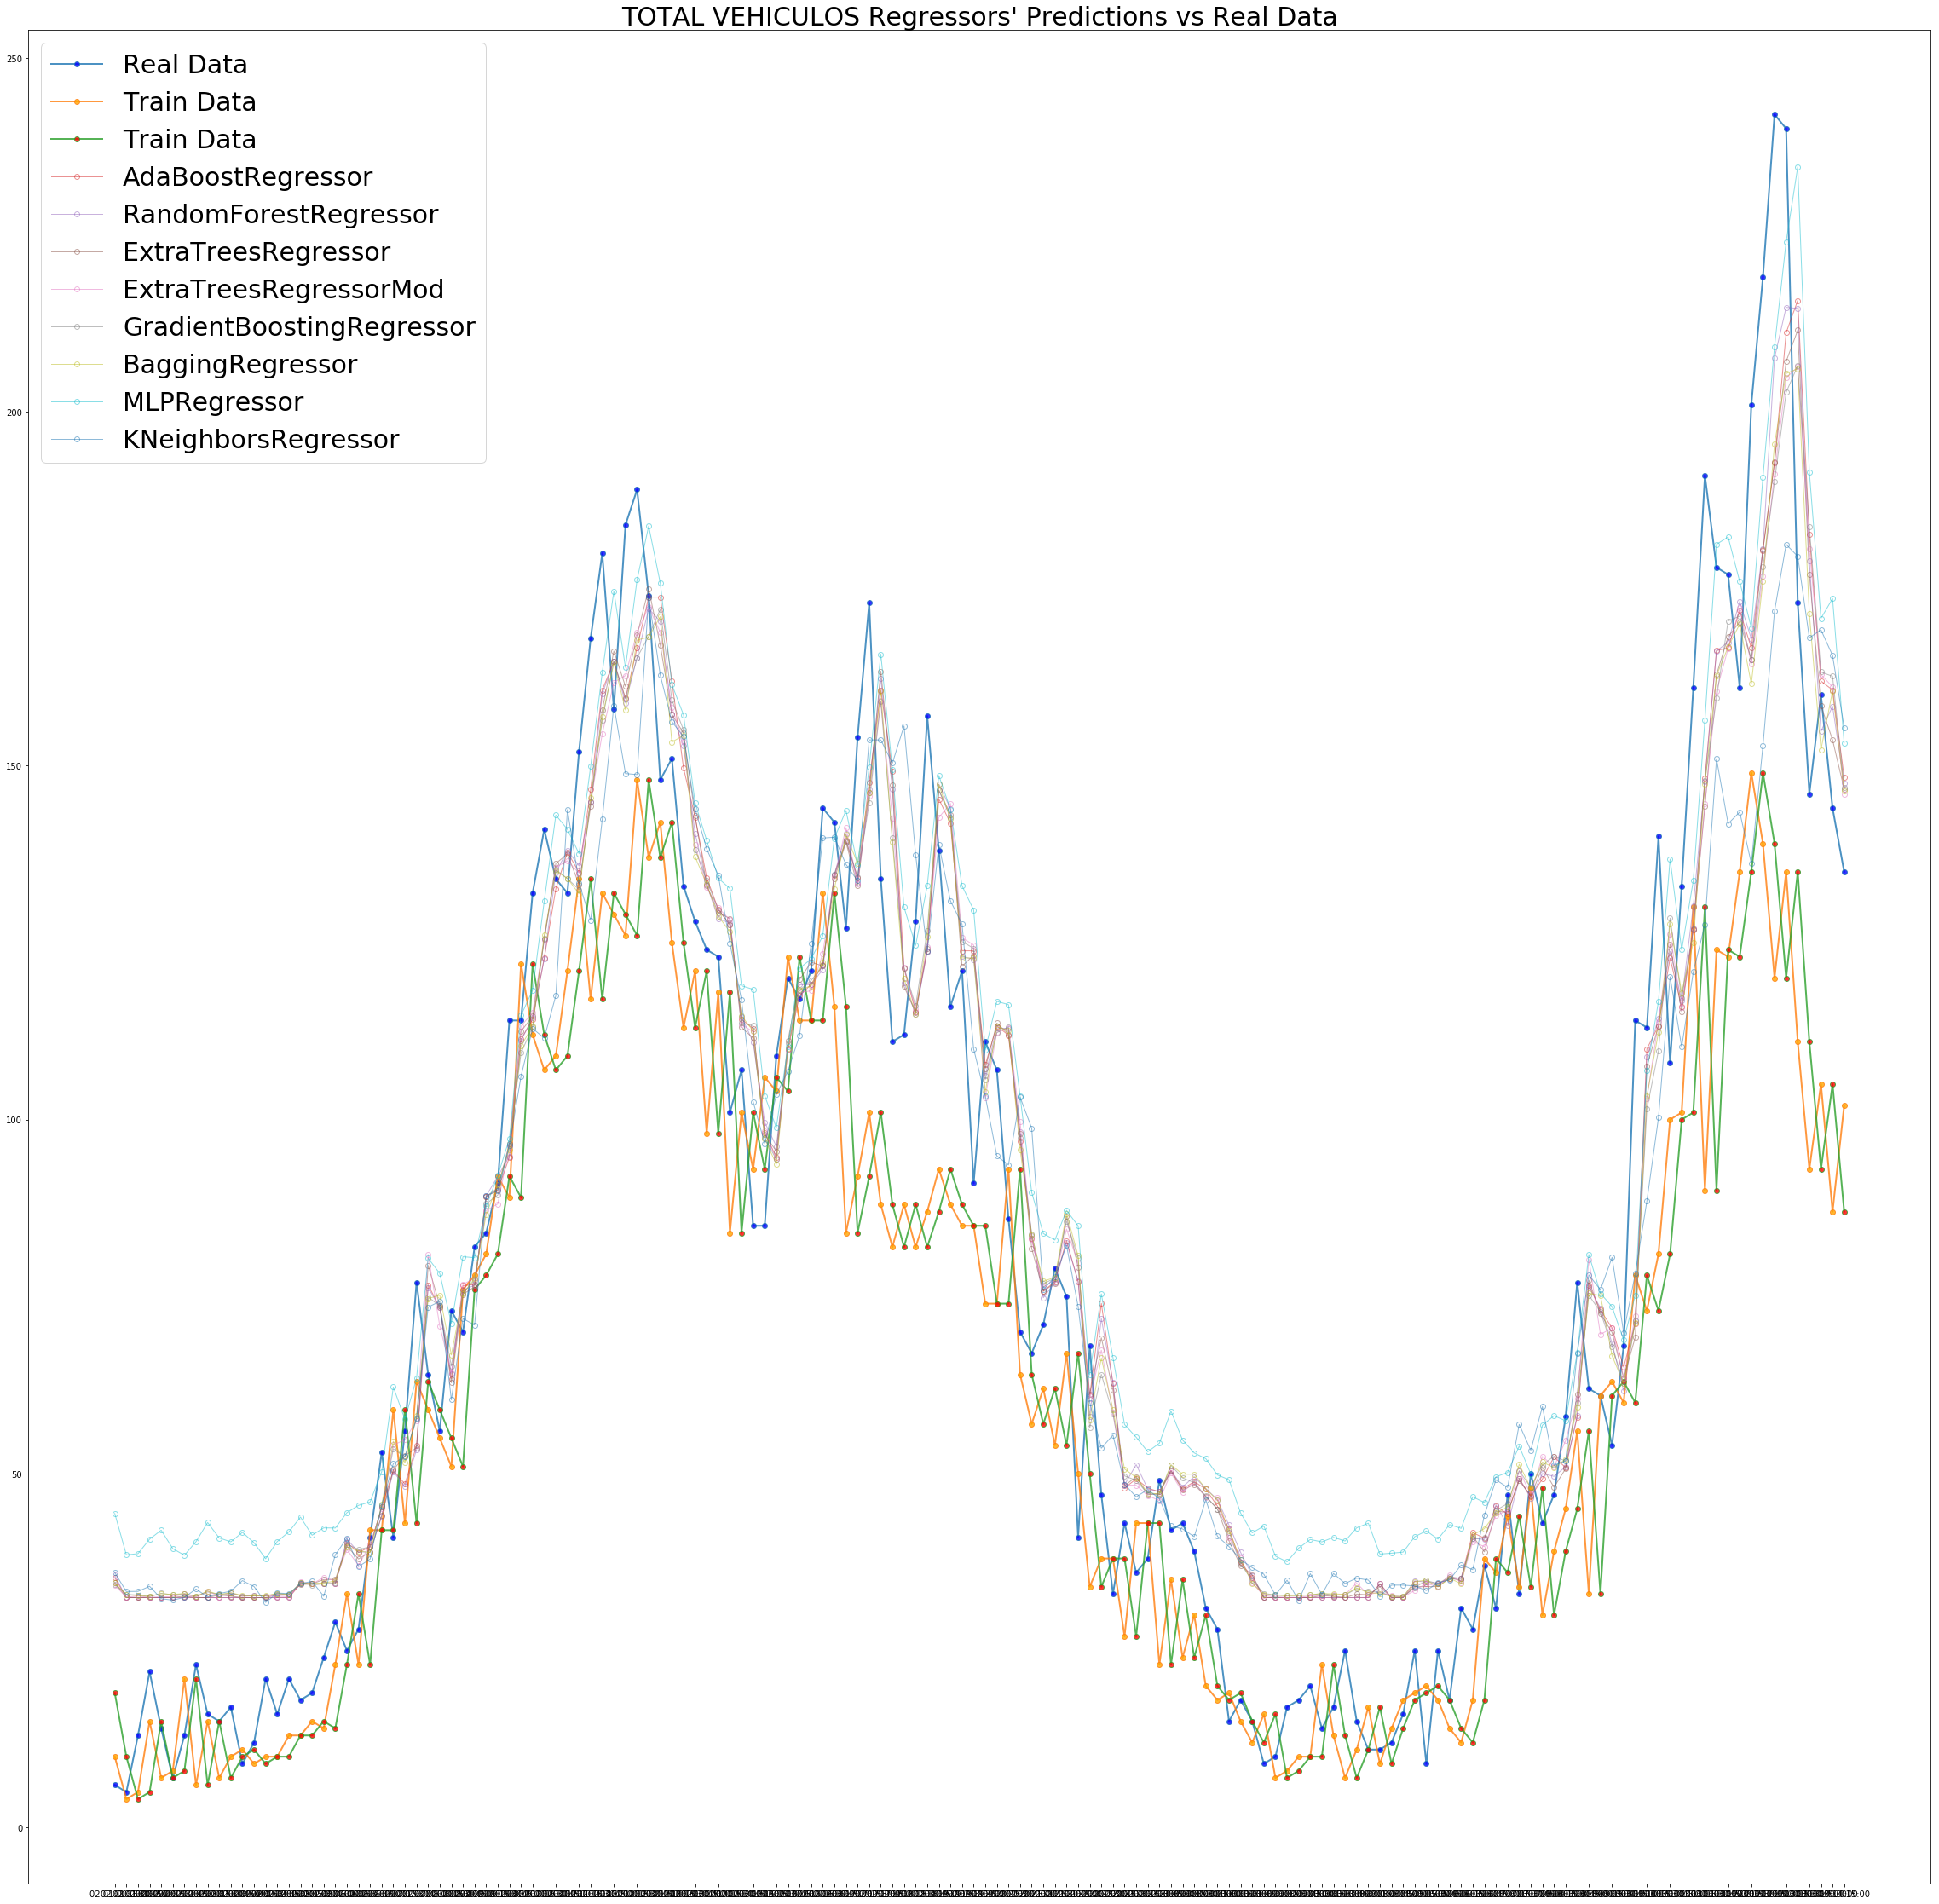

In [141]:
plt.figure(figsize=(40,40))
plt.title("TOTAL VEHICULOS Regressors' Predictions vs Real Data" ,  fontsize=30)

plt.plot(test_data.TIME[100:250], test_data['TOTAL_VEHICULOS'][100:250],'-o', markerfacecolor="blue", label='Real Data', linewidth=2, alpha=0.8)
plt.plot(train_data.TIME[100:250], train_data['TOTAL_VEHICULOS'][100:250],'-o', markerfacecolor="orange", label='Train Data', linewidth=2, alpha=0.8)
plt.plot(train_data.TIME[100:250], train_data['TOTAL_VEHICULOS_1'][100:250],'-o', markerfacecolor="red", label='Train Data', linewidth=2, alpha=0.8)


for regr_name, regr_properties in mlmodels_dict.items():   
    plt.plot(test_data.TIME[100:250], regr_properties['test'][100:250],'-o',  markerfacecolor="None" , label=regr_name, linewidth=1, alpha=0.5)

plt.legend(loc='best',  fontsize=30)

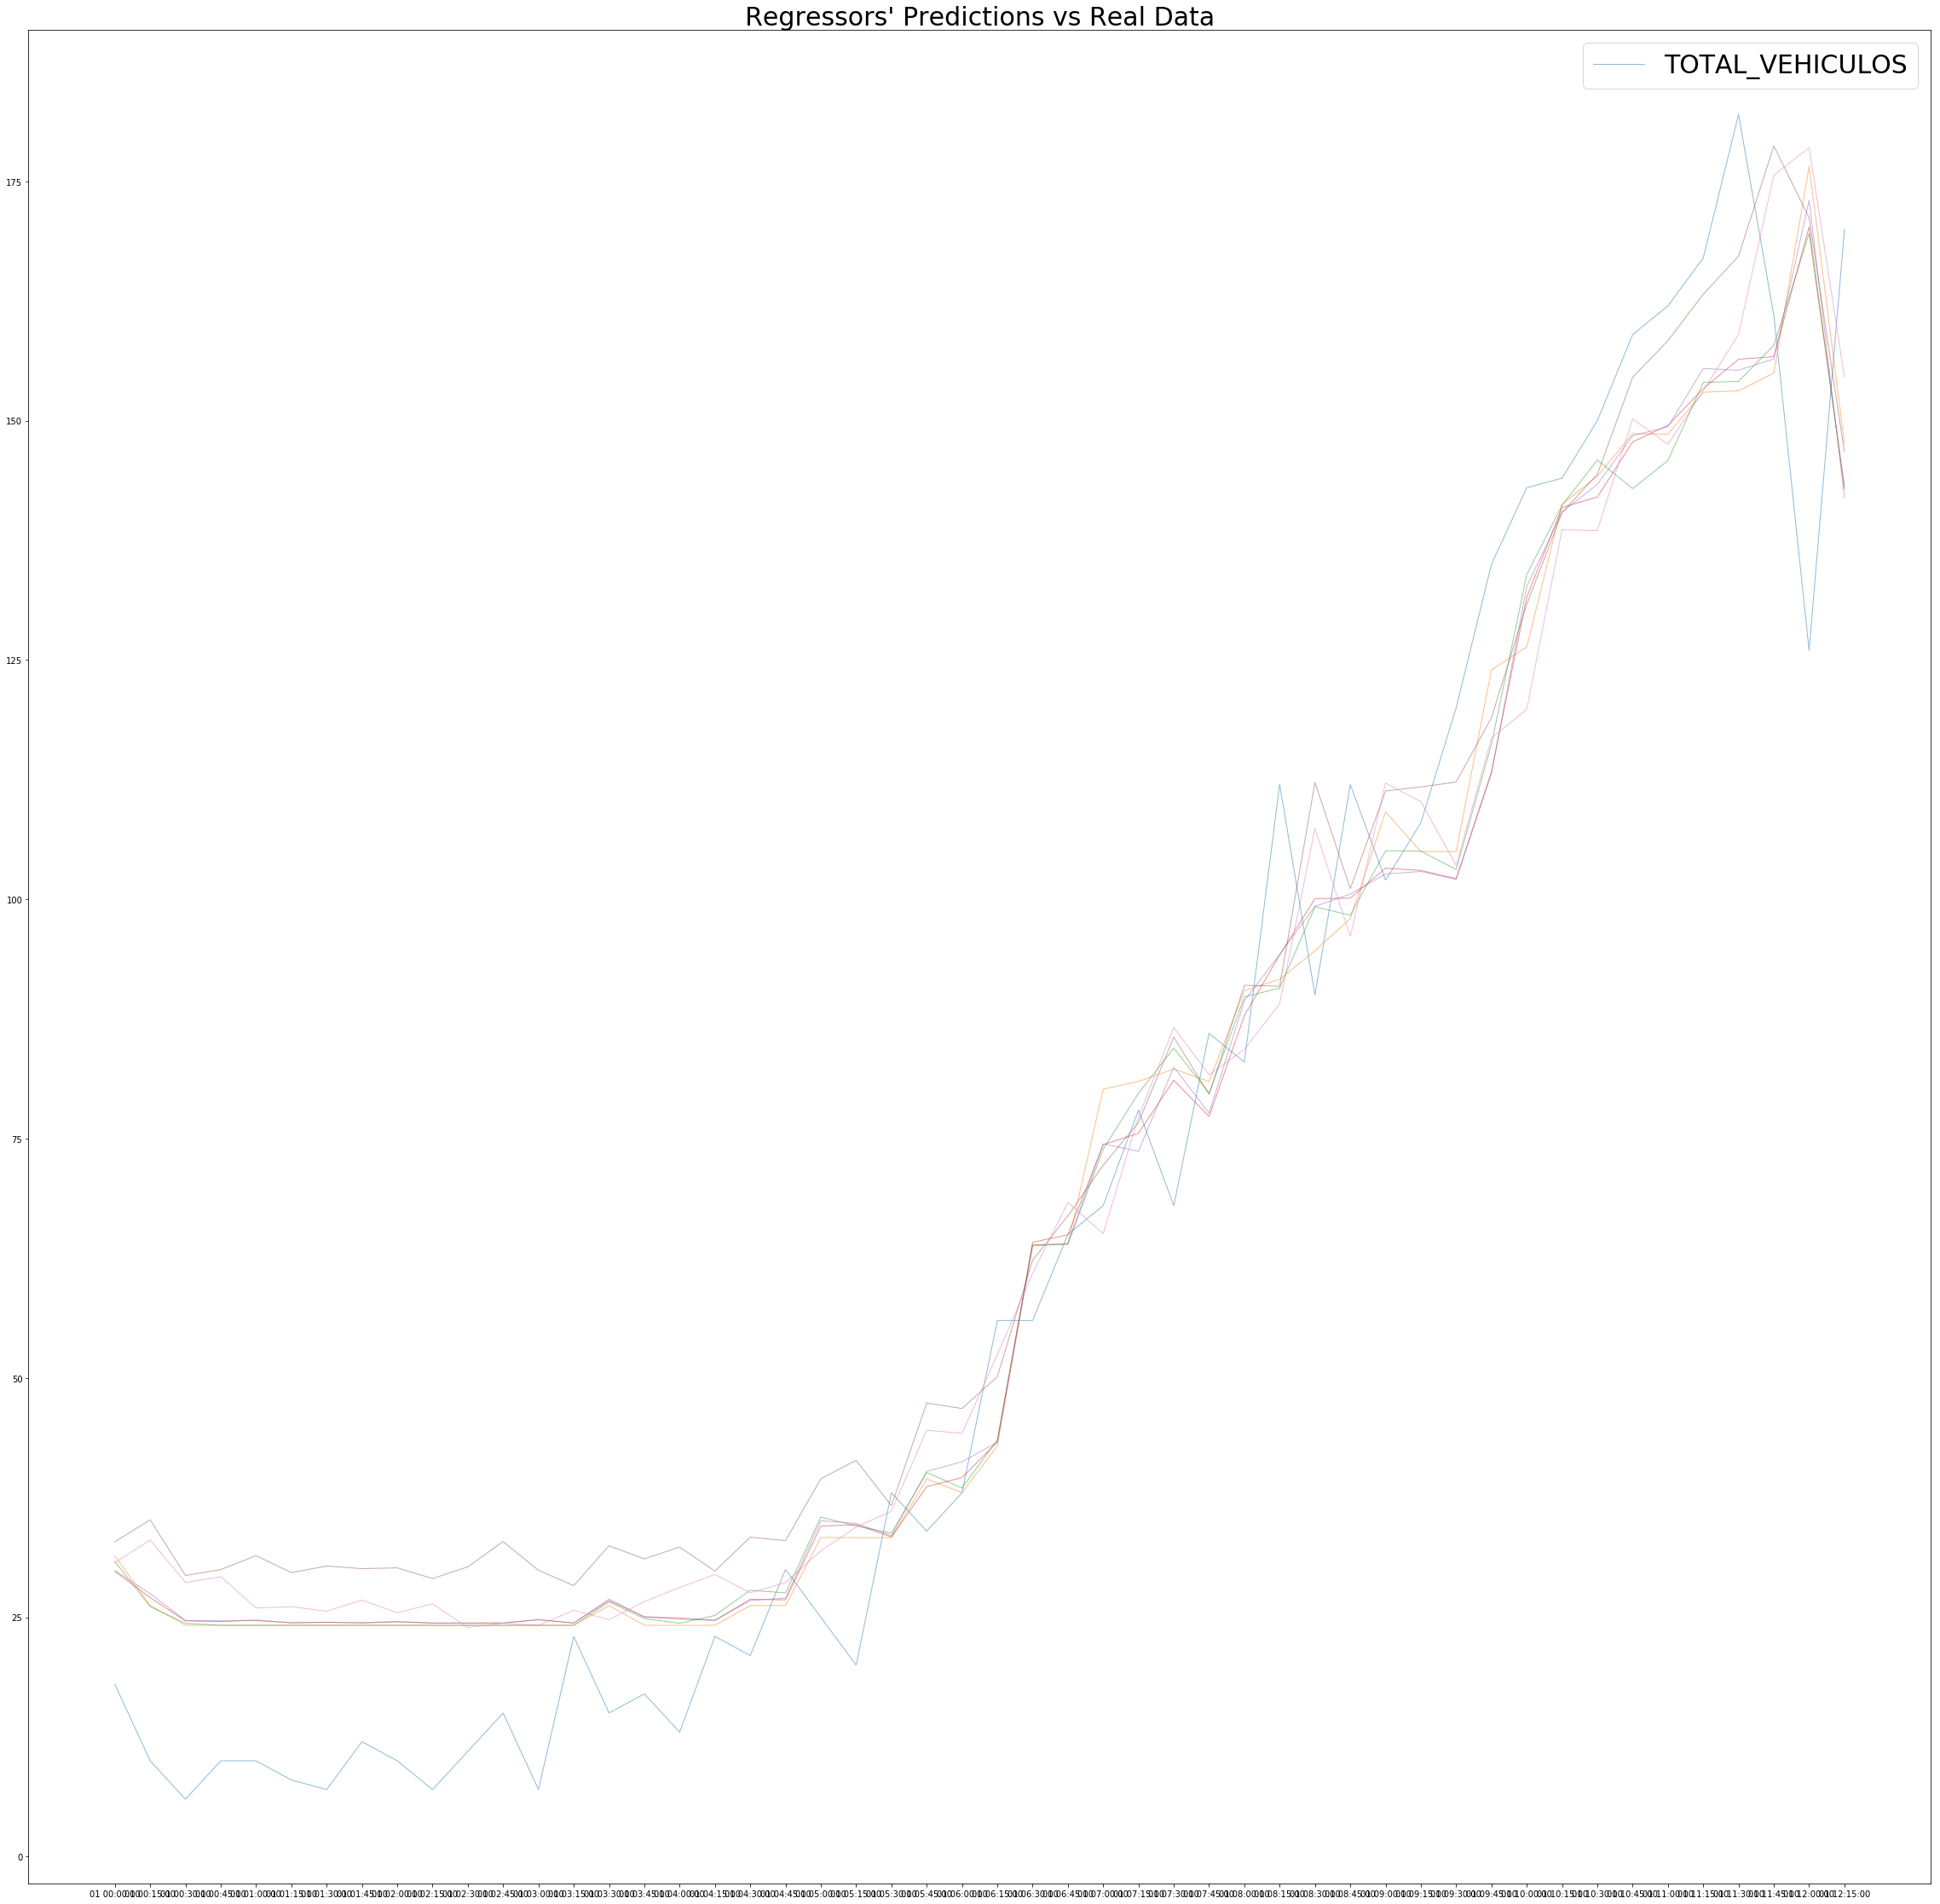

In [113]:

plt.figure(figsize=(40,40))
plt.title("Regressors' Predictions vs Real Data" ,  fontsize=30)

plt.plot(test_data.TIME[0:50], test_data['TOTAL_VEHICULOS'][0:50], markerfacecolor="None", linewidth=1, alpha=0.5)

for regr_name, regr_properties in mlmodels_dict.items():   
    plt.plot(test_data.TIME[0:50], regr_properties['test'][0:50],  markerfacecolor="None" , linewidth=1, alpha=0.5)

plt.legend(loc='best',  fontsize=30)